# Data Visualization - Covid-19 (SUS Brazil)

Source: https://opendatasus.saude.gov.br/dataset/bd-srag-2020

Database: https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2020/INFLUD-08-02-2021.csv

Data dictionary: https://opendatasus.saude.gov.br/dataset/ae90fa8f-3e94-467e-a33f-94adbb66edf8/resource/8f571374-c555-4ec0-8e44-00b1e8b11c25/download/dicionario_de_dados_srag_hospitalizado_atual-sivepgripe.pdf

In [1]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.
%load_ext autoreload
%autoreload 2

In [2]:
from readData import read_data
from graphs.plot_graphs import plot_graph, death_rate_graph
from brasil.covid_brasil import *
from belo_horizonte.covid_bh import *
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go

In [3]:
df_srag = read_data('INFLUD-08-02-2021.csv')

## SUS Brasil data analysis

In [4]:
df_covid_pcr_br = first_symptoms_pcr_br(df_srag)

In [5]:
plot_graph(df_covid_pcr_br, 'DT_SIN_PRI', 'PCR_SARS2', 'Data do início dos sintomas x Confirmação diagnóstico de Covid-19 por PCR', 'Data dos primeiros sintomas', 'Número de pacientes confirmados por PCR')

In [6]:
df_covid_br = first_symptoms_br(df_srag)

In [7]:
plot_graph(df_covid_br, 'DT_SIN_PRI', 'SUM', 'Data do início dos sintomas x Confirmação diagnóstico Covid-19', 'Data dos primeiros sintomas', 'Número de pacientes confirmados com Covid-19')

In [8]:
df_lag_report_days = lag_report_days(df_srag)

In [9]:
plot_graph(df_lag_report_days, 'DT_RES', 'SUM', 'Confirmações de Covid-19 por Data', 'Data divulgação resultado de exame de Covid-19', 'Número de resultados divulgados')

In [10]:
df_age_covid_confirmed_cases_br = age_covid_confirmed_cases_br(df_srag)

In [11]:
plot_graph(df_age_covid_confirmed_cases_br[1:110], 'NU_IDADE_N', 'SUM', 'Idade de pessoas identificadas com Covid-19 no método PCR_SARS2', 'Idade dos pacientes identificados com Covid-19', 'Número de pacientes confirmados com Covid-19')

## Belo Horizonte
### Infected population

In [12]:
df_bh_infected = infected_population_covid_bh(df_srag)

In [13]:
plot_graph(df_bh_infected, 'DT_SIN_PRI', 'SUM', 'Data do início dos sintomas x Confirmação diagnóstico Covid-19 em BH', 'Data dos primeiros sintomas', 'Número de pacientes confirmados com Covid-19')

### UTI (ICU) data 

In [14]:
df_bh_uti = uti_data_covid_bh(df_srag)

In [15]:
plot_graph(df_bh_uti, 'DT_ENTUTI', 'SUM', 'Soma de Pessoas que deram entrada em UTI por data na rede SUS de Belo Horizonte', 'Data de entrada na UTI', 'Número de entradas de pacientes em UTI')

### Infected evolution to death

In [16]:
df_bh_death_infected_uti = uti_deaths_covid_bh(df_srag)

In [17]:
plot_graph(df_bh_death_infected_uti, 'DT_ENTUTI', 'SUM', 'Data do início dos sintomas x Falecimento por Covid-19 em BH na UTI', 'Data dos primeiros sintomas', 'Número de pacientes falecidos por Covid-19')

In [18]:
# plotar dados de mortos sem irem para UTI em BH
df_bh_death_infected_uti_waiting = waiting_uti_deaths_covid_bh(df_srag)

In [19]:
plot_graph(df_bh_death_infected_uti_waiting, 'DT_ENTUTI', 'SUM', 'Data do início dos sintomas x Falecimento por Covid-19 em BH esperando UTI', 'Data dos primeiros sintomas', 'Número de pacientes falecidos por Covid-19')

### Death rate for Covid-19 UTI(ICU) patients

In [20]:
df_rate_uti_death = df_bh_death_infected_uti.merge(df_bh_uti, left_on='DT_ENTUTI',right_on='DT_ENTUTI', how='inner')
df_rate_uti_death['DEATH_UTI_RATE'] = df_rate_uti_death['SUM_x']/df_rate_uti_death['SUM_y']

In [21]:
plot_graph(df_rate_uti_death, 'DT_ENTUTI', 'DEATH_UTI_RATE', 'Data do início dos sintomas x Falecimento por Covid-19 em BH esperando UTI', 'Data dos primeiros sintomas', 'Número de pacientes falecidos por Covid-19')

/home/raydan/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

Mean: 0.5104925362816041
Median: 0.5
Mode: 0.5


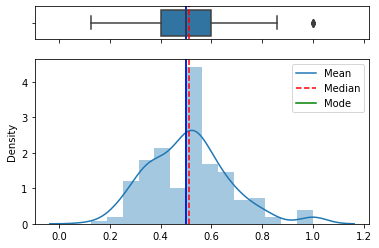

In [22]:
death_rate_graph(df_rate_uti_death)